# 📊 Exploratory Data Analysis (EDA): Memahami Pola & Insight Data 🔍

Setelah berhasil melakukan **scraping** dan **preprocessing** data ulasan dari Google Play Store, langkah selanjutnya adalah melakukan **Exploratory Data Analysis (EDA)**.

EDA bertujuan untuk:
- Memahami distribusi data
- Mengidentifikasi pola-pola umum dalam ulasan pengguna
- Menemukan outlier atau anomali
- Menggali insight awal yang dapat digunakan untuk analisis lanjutan seperti sentimen atau clustering
---

## 🔧 **Libraries Used**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer


## 📥 **Import Data CSV**

In [5]:
# Import data
file_path = "../data/2_preprocess_running_tracker.csv"
df = pd.read_csv(file_path)
df.head()

,reviewId,userName,userImage,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_cleaned,sentiment_polarity,sentiment_subjective,sentiment_rating
0,aaa7089c-2edc-46de-84d1-ef6434a011f2,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,5,0,1.7.4,2025-03-12 09:42:30,No Reply,No Reply,1.7.4,really like,0.20,0.200000,Positive
1,a02fb34e-14a1-4345-8b63-dc3b9ddd1f74,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,4,0,1.7.4,2025-03-12 06:48:45,Your praise is the greatest encouragement to u...,2025-03-12 14:16:05,1.7.4,good,0.70,0.600000,Positive
2,0be62035-3d04-4d3d-b2a6-9efd5c48cbab,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,1,0,1.7.4,2025-03-12 06:17:30,"Hi, thanks for your feedback. Could you send u...",2025-03-12 14:47:29,1.7.4,cannot away notifications,0.00,0.000000,Negative
3,28ebad27-72a8-4eca-9fce-2905485b078f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,5,0,1.7.5,2025-03-12 00:38:33,No Reply,No Reply,1.7.5,great,0.80,0.750000,Positive
4,f9d6dee5-6a10-42ec-8009-16b487a5e075,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,5,0,1.7.5,2025-03-11 22:23:05,No Reply,No Reply,1.7.5,not bad,0.35,0.666667,Positive


## Review Score Distribution

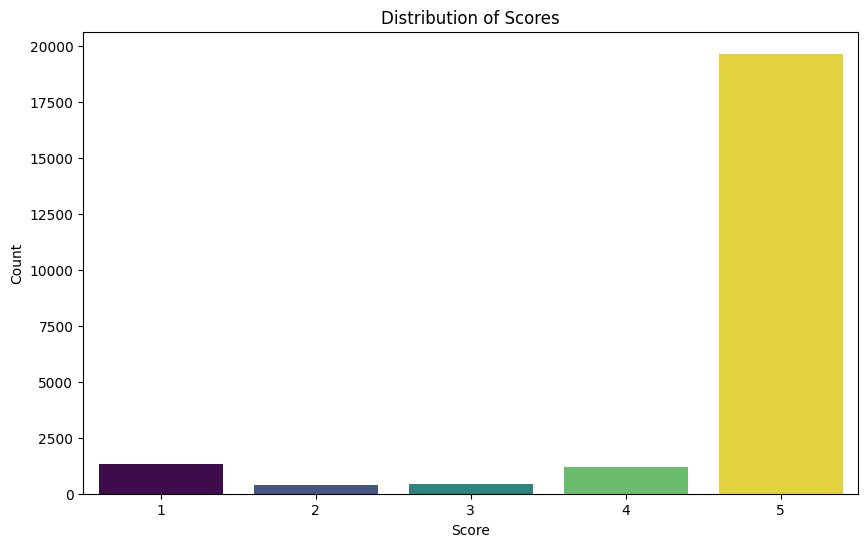

In [7]:
# Analisis deskriptif untuk kolom 'score'
score_counts = df['score'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=score_counts.index, y=score_counts.values, hue=score_counts.index, palette='viridis', legend=False)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

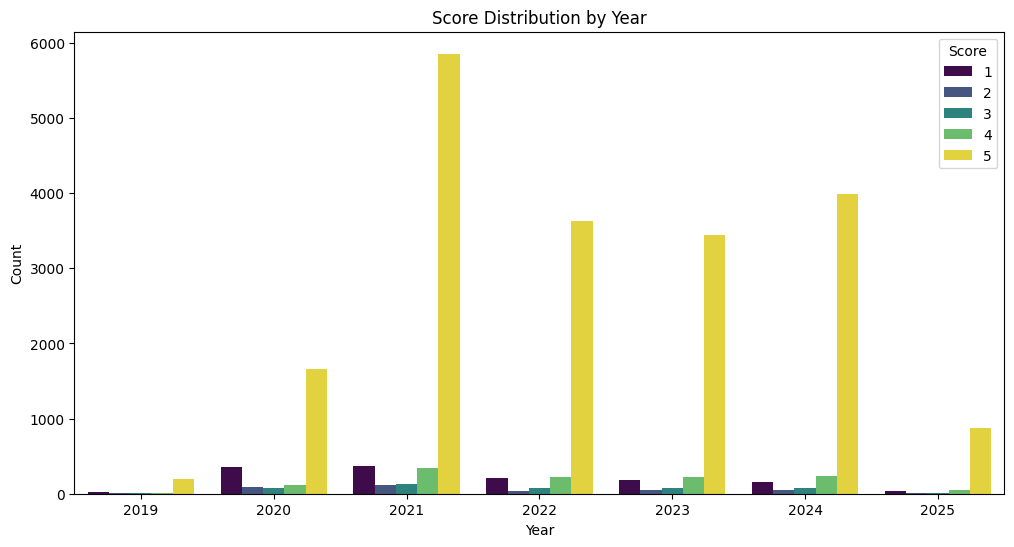

In [11]:
# Cross tabulasi antara 'year' dan 'score'
plt.figure(figsize=(12, 6))
sns.countplot(x='year', hue='score', data=df, palette='viridis')
plt.title('Score Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Score')
plt.show()

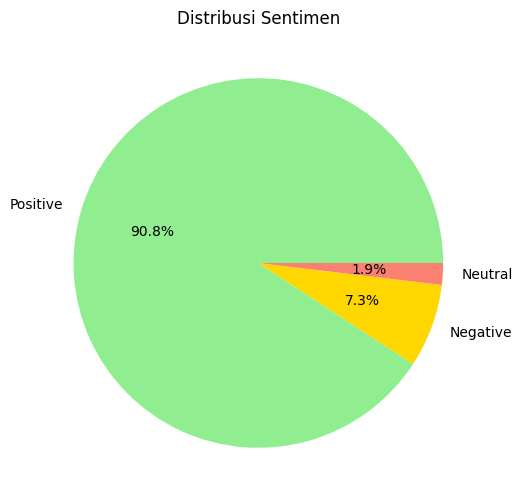

In [27]:
sentiment_counts = df['sentiment_rating'].value_counts()

plt.figure(figsize=(6, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'gold', 'salmon'])
plt.title('Distribusi Sentimen')
plt.ylabel('')
plt.show()

## Panjang komentar

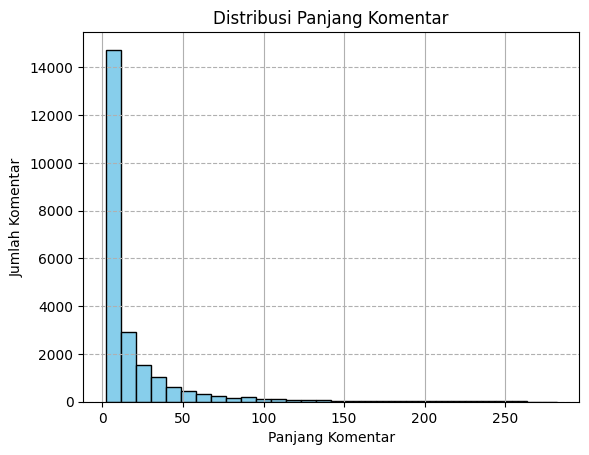

count    22961.000000
mean        18.530334
std         30.361702
min          2.000000
25%          4.000000
50%          6.000000
75%         19.000000
max        282.000000
dtype: float64


In [6]:
import matplotlib.pyplot as plt
class EDA():
    def get_length_dist(self, data):
        rev_len = [len(i) for i in data]
        pd.Series(rev_len).hist(bins=30, color='skyblue', edgecolor='black')
        plt.title('Distribusi Panjang Komentar')
        plt.xlabel('Panjang Komentar')
        plt.ylabel('Jumlah Komentar')
        plt.grid(axis='y', linestyle='--')
        plt.show()
        print(pd.Series(rev_len).describe())

eda = EDA()
eda.get_length_dist(df['content_cleaned'])

## Jumlah review per tahun

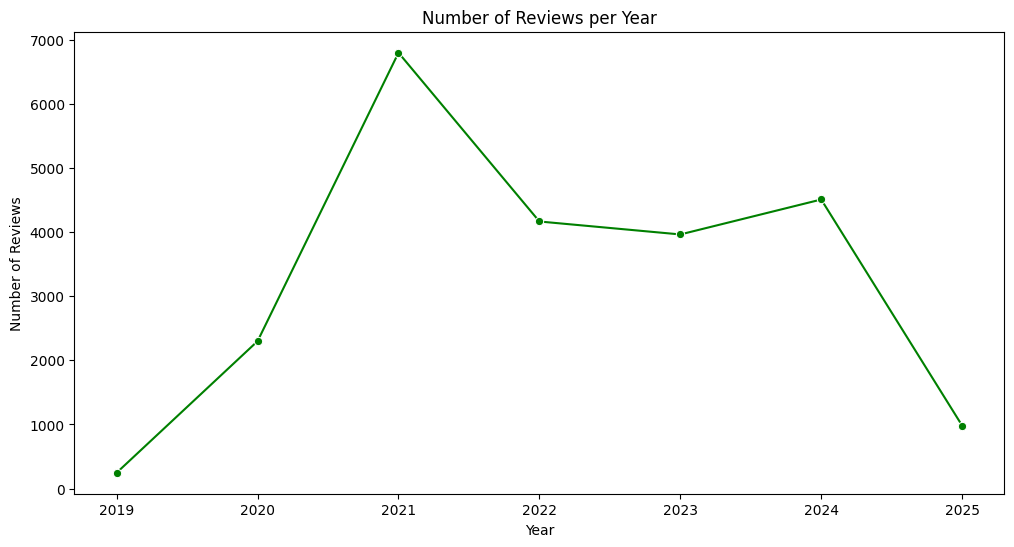

In [26]:
df['at'] = pd.to_datetime(df['at'])
df['year'] = df['at'].dt.year
year_counts = df['year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='green')
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

## Workcloud

[nltk_data] Downloading package stopwords to C:\Users\Annisa
[nltk_data]     Fadila\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


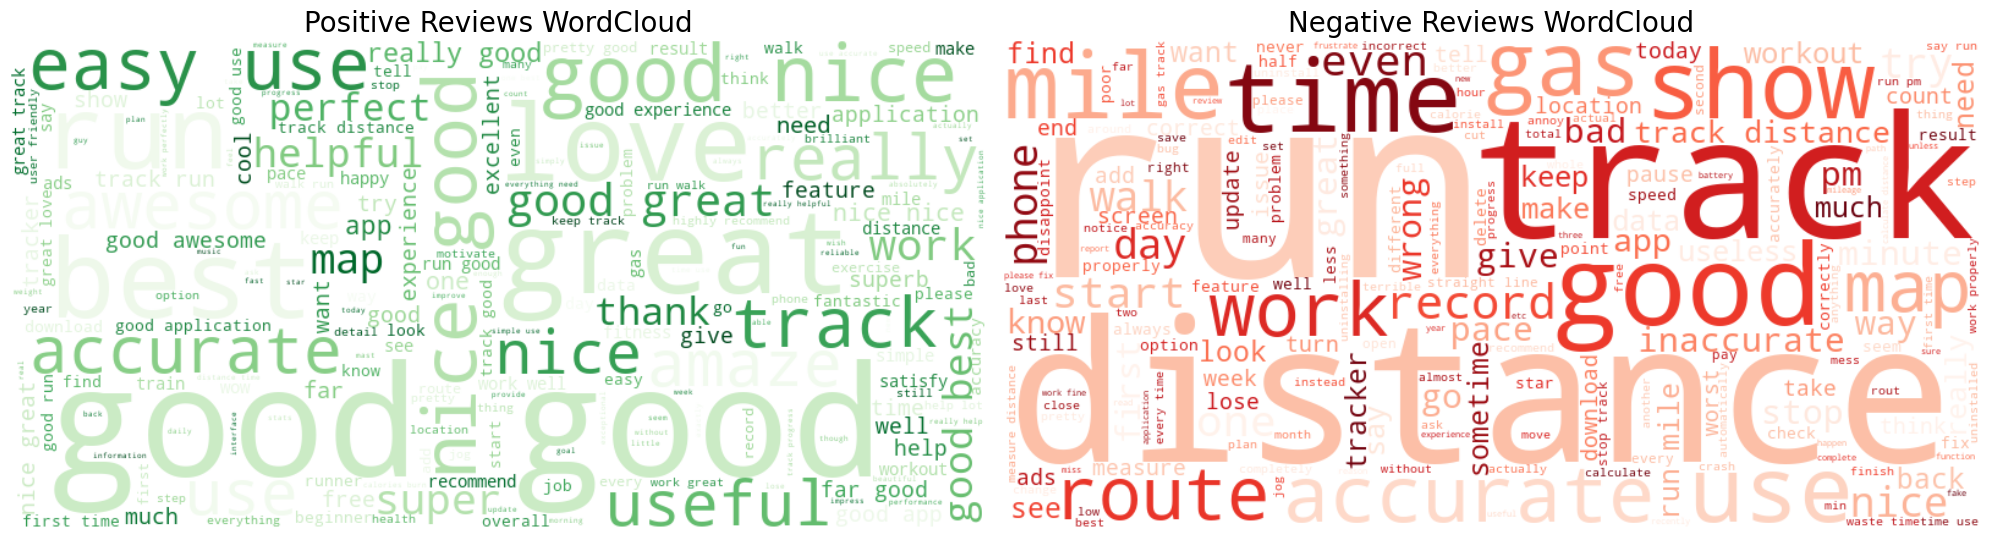

In [14]:
# Stopwords Bahasa Inggris
stop_words = set(stopwords.words('english'))

# Fungsi untuk menghapus stopwords dari teks
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Gunakan kolom 'content_cleaned' yang sudah diproses
positive_reviews = df[df['score'] >= 4]['content_cleaned'].dropna()
negative_reviews = df[df['score'] <= 3]['content_cleaned'].dropna()

# Gabungkan seluruh ulasan menjadi satu string
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

# Bersihkan dari stopwords
positive_text = remove_stopwords(positive_text)
negative_text = remove_stopwords(negative_text)

# Generate WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_wc = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)
negative_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

# Tampilkan
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(positive_wc, interpolation='bilinear')
ax[0].set_title('Positive Reviews WordCloud', fontsize=20)
ax[0].axis('off')

ax[1].imshow(negative_wc, interpolation='bilinear')
ax[1].set_title('Negative Reviews WordCloud', fontsize=20)
ax[1].axis('off')

plt.tight_layout()
plt.show()


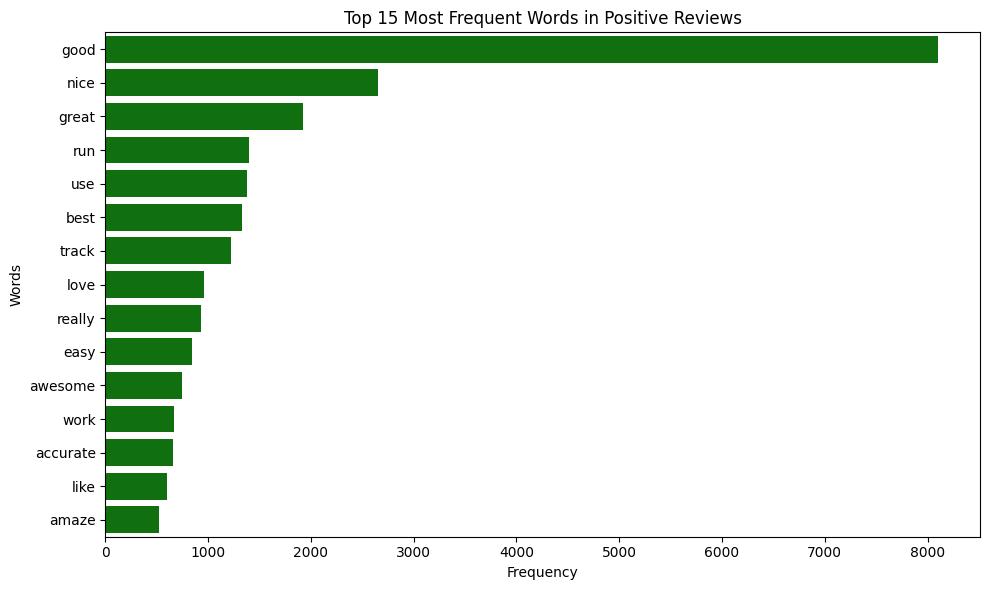

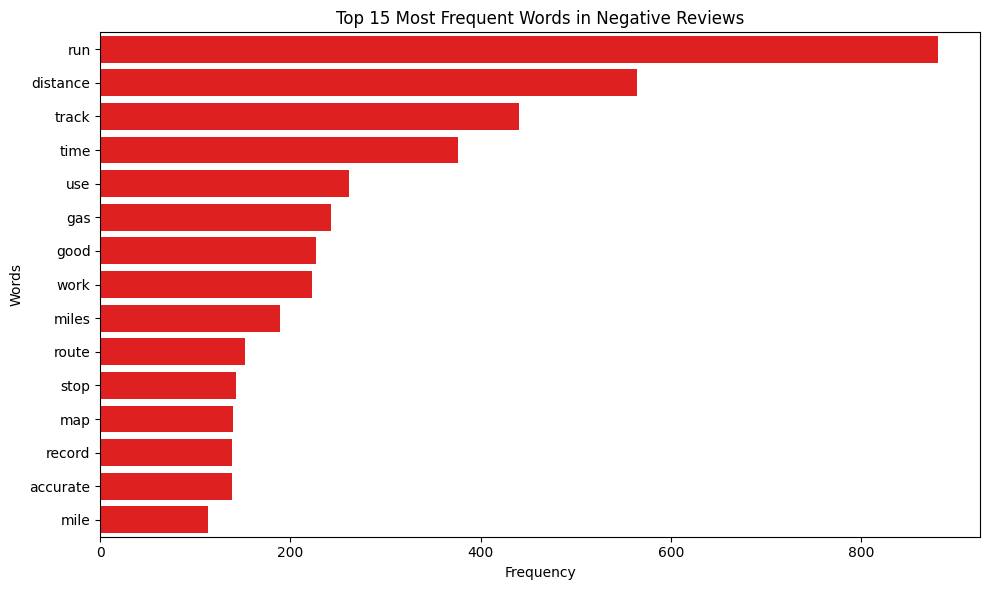

In [24]:
positive_reviews = df[df['sentiment_rating'] == 'Positive']['content_cleaned'].dropna()
negative_reviews = df[df['sentiment_rating'] == 'Negative']['content_cleaned'].dropna()

# Fungsi untuk plot top-N words
def plot_top_words(texts, title, n=15, color='green'):
    # Vectorizer
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(texts)

    # Sum semua kata
    word_counts = X.toarray().sum(axis=0)
    word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))

    # Ambil top-n
    top_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:n]
    words, counts = zip(*top_words)

    # Visualisasi
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), color=color)
    plt.title(f'Top {n} Most Frequent Words in {title} Reviews')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.tight_layout()
    plt.show()

# Plot untuk Positive Reviews
plot_top_words(positive_reviews, title='Positive', color='green')

# Plot untuk Negative Reviews
plot_top_words(negative_reviews, title='Negative', color='red')